load libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans


# 1. Load your dataset. 



In [2]:
data = pd.read_csv(r'C:\ya1\a1\CC GENERAL.csv')
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


remove the CUST_ID col

In [3]:
data.drop(['CUST_ID'], axis=1,inplace=True)
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


drop na

In [4]:
data.dropna(axis = 0, how ='any',inplace=True)

# 2. Use hierarchical clustering to identify the inherent groupings within your data.

In [5]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric


In [6]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative.value_counts()

0    8606
2      20
1       7
4       2
3       1
dtype: int64

# 3. Plot the clusters. 

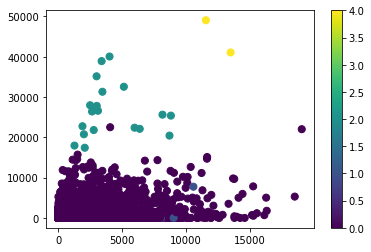

In [7]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['BALANCE'] , data ["PURCHASES"] , c= agglomerative[0], s=50)

plt.colorbar(scatter)

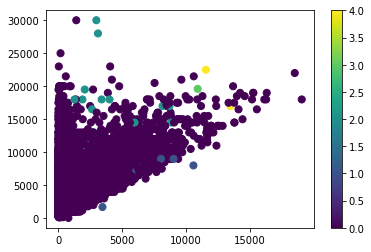

In [8]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['BALANCE'] , data ["CREDIT_LIMIT"] , c= agglomerative[0], s=50)
plt.colorbar(scatter)

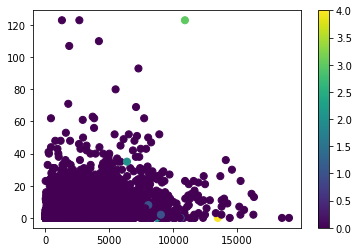

In [9]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['BALANCE'] , data ["CASH_ADVANCE_TRX"] , c= agglomerative[0], s=50)
plt.colorbar(scatter)

# 4. Plot the dendrogram. 

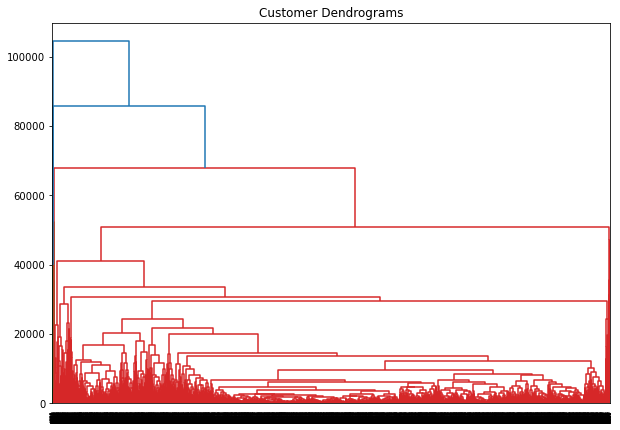

In [10]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

## Use k-means clustering. 

# 5. Try different k values and select the best one. 
The Elbow Method and Number of clusters

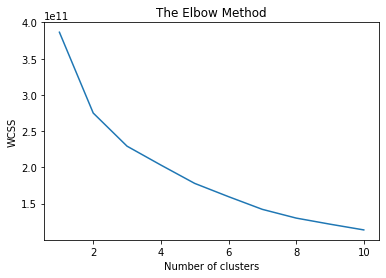

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# the best k =3

In [12]:
kmeans=KMeans(n_clusters=3, random_state=0)  #Cluster our data by choosing 5 as number of clusters
y_kmeans = kmeans.fit_predict(data)

In [22]:
label=pd.DataFrame(kmeans.labels_)
data['label']=pd.DataFrame(kmeans.labels_)
label.value_counts()

0    6305
1    2203
2     128
dtype: int64

# Visualising the clusters

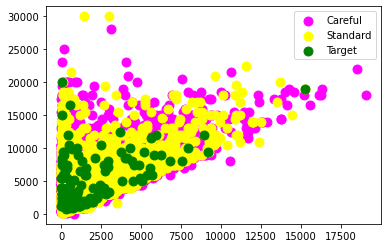

<Figure size 720x504 with 0 Axes>

In [23]:
X=data
plt.scatter(data["BALANCE"][data.label == 0],    data["CREDIT_LIMIT"][data.label == 0],s=80,c='magenta',label='Careful')
plt.scatter(data["BALANCE"][data.label == 1],data["CREDIT_LIMIT"][data.label == 1],s=80,c='yellow',label='Standard')
plt.scatter(data["BALANCE"][data.label == 2], data["CREDIT_LIMIT"][data.label == 2],s=80,c='green',label='Target')
plt.legend()
plt.figure(figsize=(10,7))
plt.show()

# 6. Plot the clusters using Dendrograms . 

ValueError: The condensed distance matrix must contain only finite values.

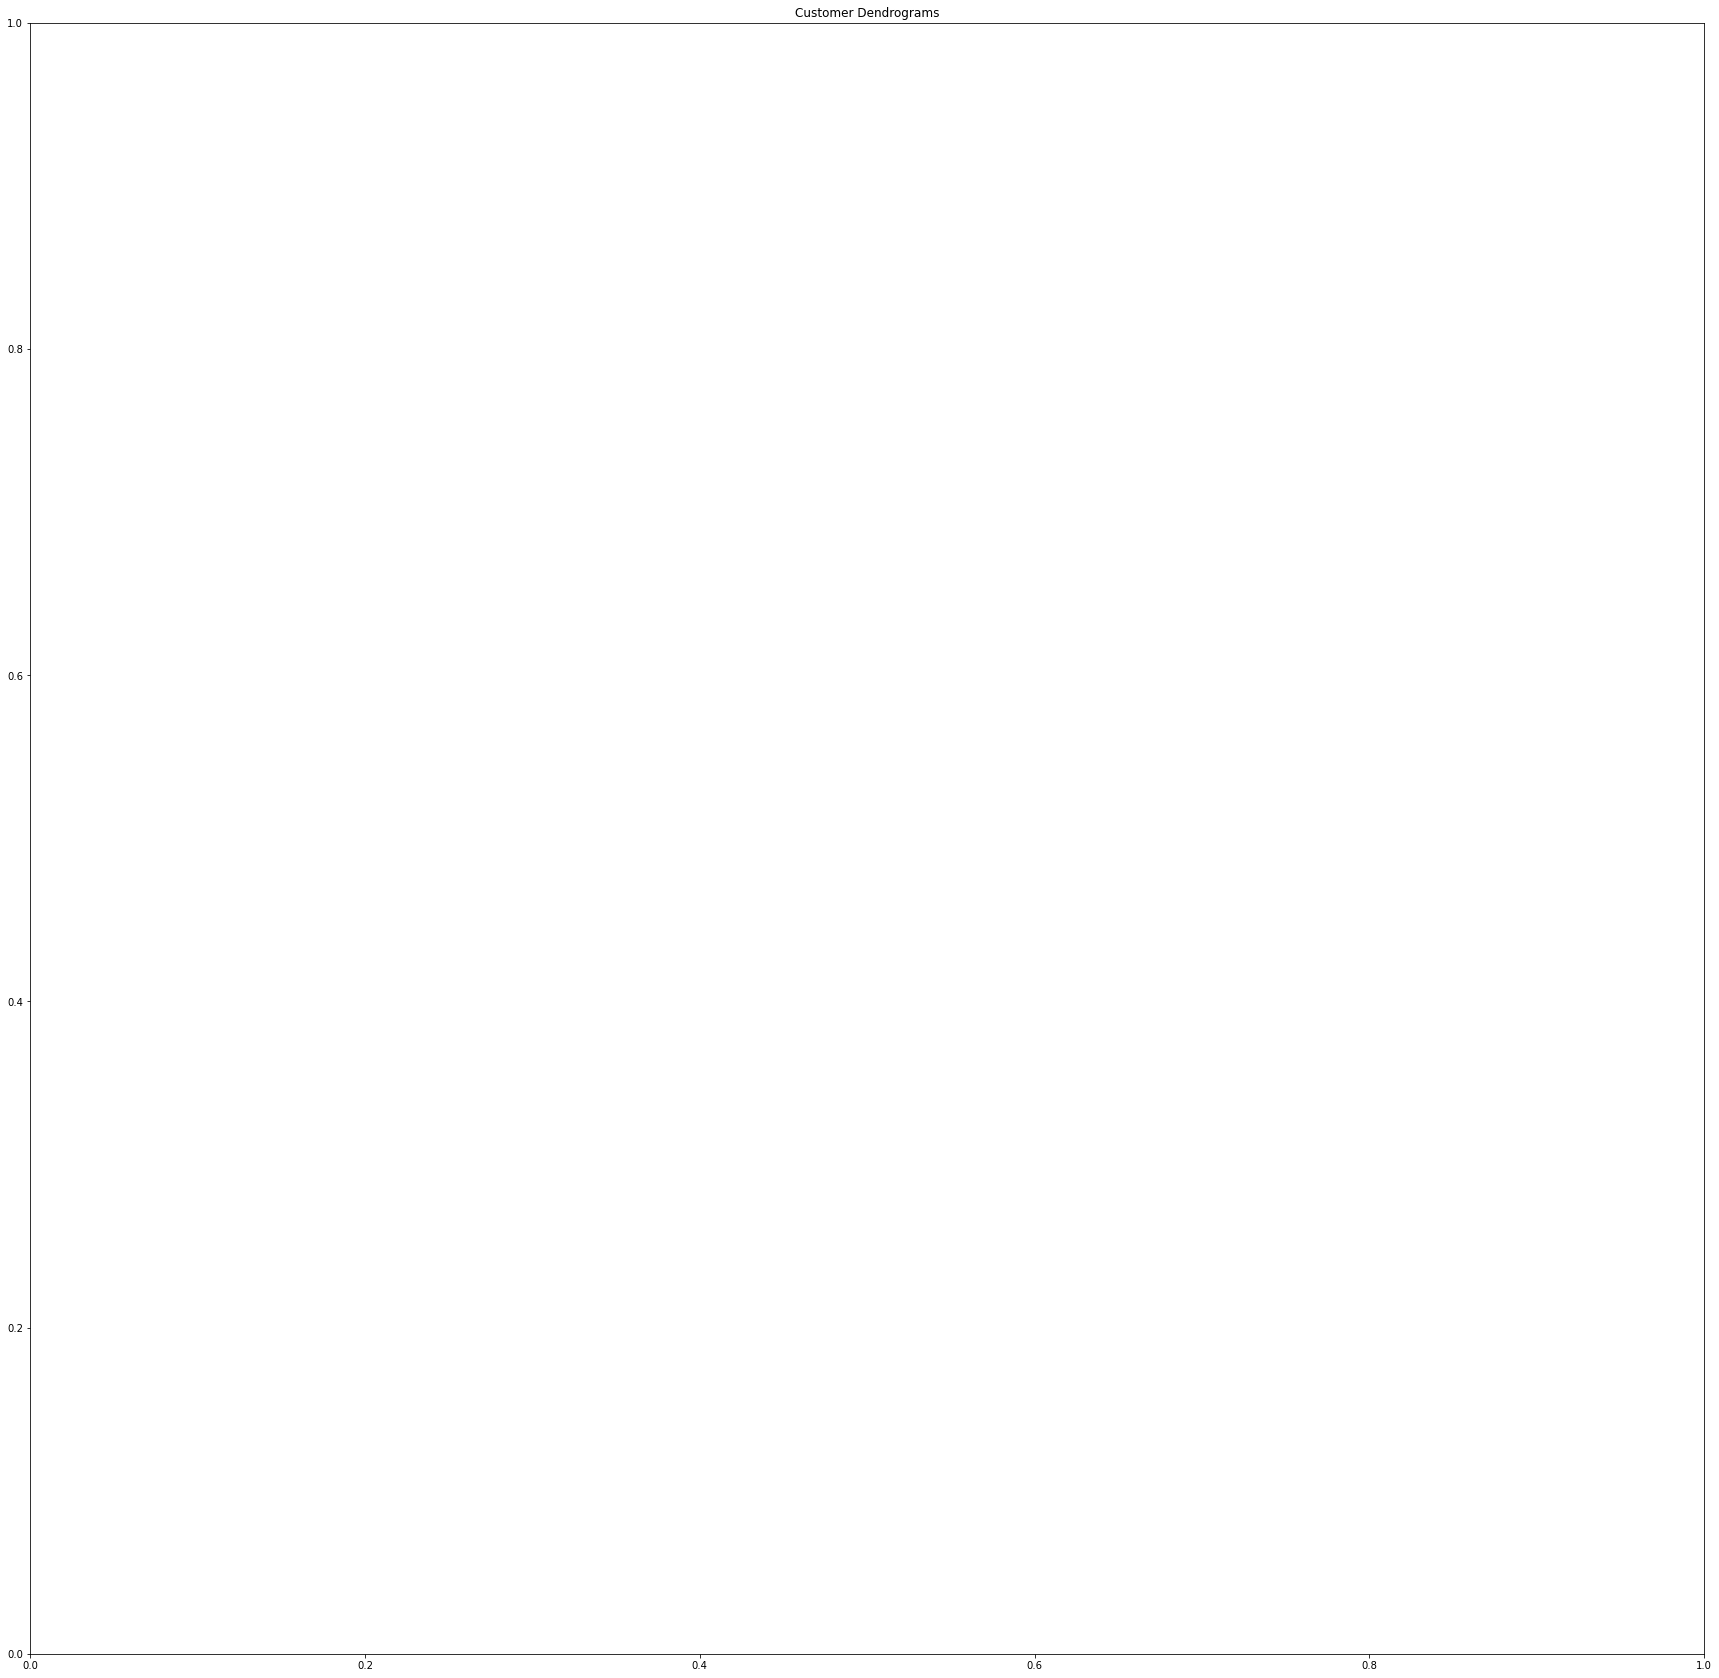

In [24]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30,30))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))